In [9]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

file = uproot.open("/data/jlai/iris-hep/odd_output/tracksummary_ckf.root")
tree = file["tracksummary"]
tree.keys()

['event_nr',
 'track_nr',
 'nStates',
 'nMeasurements',
 'nOutliers',
 'nHoles',
 'nSharedHits',
 'chi2Sum',
 'NDF',
 'measurementChi2',
 'outlierChi2',
 'measurementVolume',
 'measurementLayer',
 'outlierVolume',
 'outlierLayer',
 'nMajorityHits',
 'majorityParticleId',
 'trackClassification',
 't_charge',
 't_time',
 't_vx',
 't_vy',
 't_vz',
 't_px',
 't_py',
 't_pz',
 't_theta',
 't_phi',
 't_eta',
 't_p',
 't_pT',
 't_d0',
 't_z0',
 't_prodR',
 'hasFittedParams',
 'eLOC0_fit',
 'eLOC1_fit',
 'ePHI_fit',
 'eTHETA_fit',
 'eQOP_fit',
 'eT_fit',
 'err_eLOC0_fit',
 'err_eLOC1_fit',
 'err_ePHI_fit',
 'err_eTHETA_fit',
 'err_eQOP_fit',
 'err_eT_fit',
 'res_eLOC0_fit',
 'res_eLOC1_fit',
 'res_ePHI_fit',
 'res_eTHETA_fit',
 'res_eQOP_fit',
 'res_eT_fit',
 'pull_eLOC0_fit',
 'pull_eLOC1_fit',
 'pull_ePHI_fit',
 'pull_eTHETA_fit',
 'pull_eQOP_fit',
 'pull_eT_fit',
 'cov_eLOC0_eLOC0',
 'cov_eLOC0_eLOC1',
 'cov_eLOC0_ePHI',
 'cov_eLOC0_eTHETA',
 'cov_eLOC0_eQOP',
 'cov_eLOC0_eT',
 'cov_eLOC1_e

In [12]:
res_d0

array([array([ 1.32762827e-02,  9.99958906e-03,  3.75929940e-03, -2.03594398e-02,
               6.97011128e-03, -2.67014913e-02,  6.44526538e-03,  2.38006134e-02,
               1.28154382e-02, -1.34904599e-02, -8.04621913e-03, -2.77987085e-02,
              -6.08646274e-02,  1.23814931e-02,  2.24644262e-02, -3.01609356e-02,
               9.94039513e-03, -2.31564650e-03, -1.40086375e-02, -2.89195636e-03,
              -3.43617722e-02,  1.36107774e-02, -8.62140208e-03, -1.14208385e-02,
              -3.22318226e-02, -3.64893116e-02,  2.21332721e-03, -2.14394815e-02,
               7.47284070e-02, -3.45326550e-02,  1.51122250e-02, -1.08409924e-02,
              -2.87782326e-02, -8.88023246e-03,  6.81862934e-04, -1.22704199e-02,
               4.42696214e-02,  1.98518820e-02, -4.64146324e-02, -6.41437154e-03,
              -1.08052507e-01,  6.26173615e-03,  1.57881752e-02, -7.40297511e-03,
              -2.15570442e-04, -7.39275292e-03, -1.38509478e-02, -2.46344134e-02,
               1

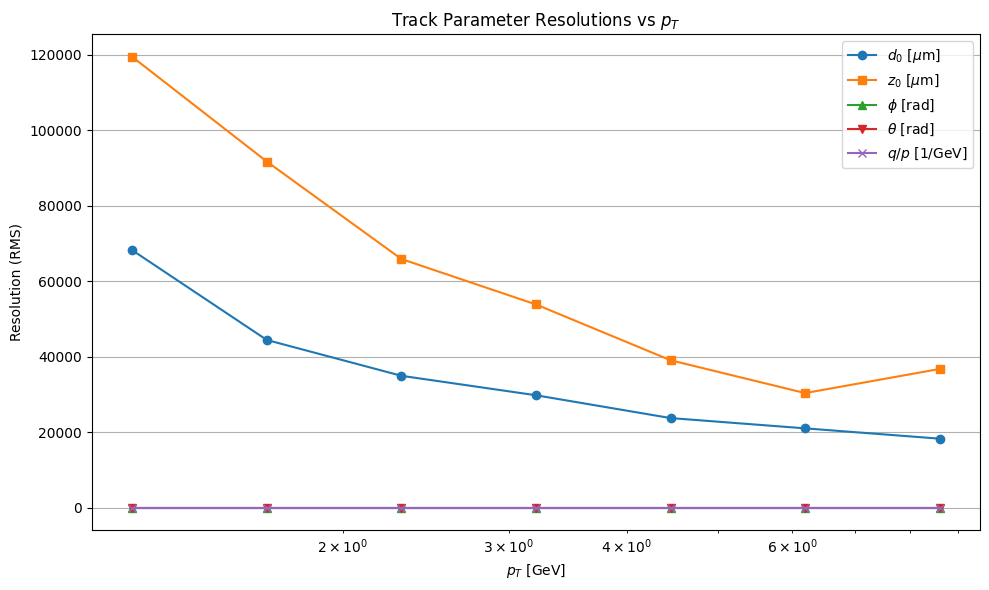

In [14]:
# pT = tree["t_pT"].array(library="np")
# res_d0 = tree["res_eLOC0_fit"].array(library="np")
# res_z0 = tree["res_eLOC1_fit"].array(library="np")
# res_phi = tree["res_ePHI_fit"].array(library="np")
# res_theta = tree["res_eTHETA_fit"].array(library="np")
# res_qop = tree["res_eQOP_fit"].array(library="np")

pT = ak.flatten(tree["t_pT"].array())
res_d0 = ak.flatten(tree["res_eLOC0_fit"].array())
res_z0 = ak.flatten(tree["res_eLOC1_fit"].array())
res_phi = ak.flatten(tree["res_ePHI_fit"].array())
res_theta = ak.flatten(tree["res_eTHETA_fit"].array())
res_qop = ak.flatten(tree["res_eQOP_fit"].array())



def binned_rms(x, y, bins):
    bin_centers = []
    rms_vals = []
    for i in range(len(bins)-1):
        mask = (x >= bins[i]) & (x < bins[i+1])
        if np.sum(mask) > 0:
            bin_centers.append((bins[i] + bins[i+1]) / 2)
            rms_vals.append(np.std(y[mask]))
    return np.array(bin_centers), np.array(rms_vals)

# pT bins in log scale
pt_bins = np.logspace(np.log10(0.1), np.log10(10), 15)

# Compute binned RMS for each parameter
pt_centers, d0_rms = binned_rms(pT, res_d0, pt_bins)
_, z0_rms = binned_rms(pT, res_z0, pt_bins)
_, phi_rms = binned_rms(pT, res_phi, pt_bins)
_, theta_rms = binned_rms(pT, res_theta, pt_bins)
_, qop_rms = binned_rms(pT, res_qop, pt_bins)

# Plotting
plt.figure(figsize=(10, 6))
plt.xscale("log")
plt.plot(pt_centers, d0_rms * 1e6, marker='o', label=r"$d_0$ [$\mu$m]")
plt.plot(pt_centers, z0_rms * 1e6, marker='s', label=r"$z_0$ [$\mu$m]")
plt.plot(pt_centers, phi_rms, marker='^', label=r"$\phi$ [rad]")
plt.plot(pt_centers, theta_rms, marker='v', label=r"$\theta$ [rad]")
plt.plot(pt_centers, qop_rms, marker='x', label=r"$q/p$ [1/GeV]")
plt.xlabel(r"$p_T$ [GeV]")
plt.ylabel("Resolution (RMS)")
plt.title("Track Parameter Resolutions vs $p_T$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


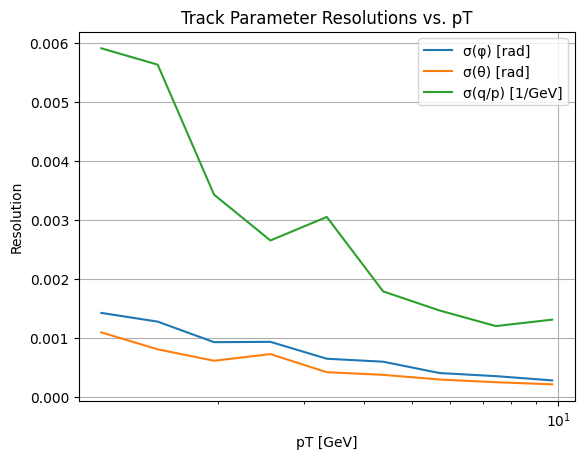

In [ ]:
pt = ak.flatten(tree["t_pT"].arrays(library="ak")["t_pT"])
bin_edges = np.logspace(0, 2.2, 20)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
digitized = np.digitize(ak.to_numpy(pt), bin_edges)   

residuals = {
    "σ(φ) [rad]": "res_ePHI_fit",
    "σ(θ) [rad]": "res_eTHETA_fit",
    # "σ(d₀) [mm]": "res_eLOC0_fit",
    # "σ(z₀) [mm]": "res_eLOC1_fit",
    "σ(q/p) [1/GeV]": "res_eQOP_fit"
}

for label, key in residuals.items():
    res = ak.flatten(tree[key].arrays(library="ak")[key])
    res_std = [ak.std(res[digitized == i]) for i in range(1, len(bin_edges))]
    plt.plot(bin_centers, res_std, label=label)

plt.xscale("log")
plt.xlabel("pT [GeV]")
plt.ylabel("Resolution")
plt.title("Track Parameter Resolutions vs. pT")
plt.grid(True)
plt.legend()
plt.show()


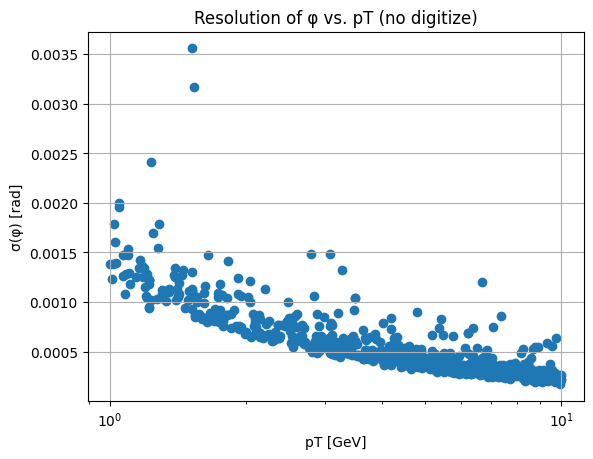

In [5]:
pt = ak.flatten(tree["t_pT"].arrays(library="ak")["t_pT"])
res_phi = ak.flatten(tree["err_ePHI_fit"].arrays(library="ak")["err_ePHI_fit"])

plt.scatter(pt, res_phi)
plt.xscale("log")
plt.xlabel("pT [GeV]")
plt.ylabel("σ(φ) [rad]")
plt.title("Resolution of φ vs. pT (no digitize)")
plt.grid(True)
plt.show()

In [4]:
values = np.array([1.5, 2.2, 4.8, 6.0])
bins = np.array([0, 2, 4, 6])

digitized = np.digitize(values, bins)
print(digitized)

[1 2 3 4]
